# Final Project Matplotlib and Seaborn Integration and advanced charts

In [1]:
# imports required in this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import PercentFormatter
import numpy as np 

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [2]:
cars = pd.read_csv(".\data\car_prices.csv", low_memory=False)
cars.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\20949\AppData\Local\Temp\ipykernel_5288\1888336994.py:1: SyntaxWarning: invalid escape sequence '\d'
  cars = pd.read_csv(".\data\car_prices.csv", low_memory=False)


,year,make,model,trim,body,transmission,vin,state,Condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [3]:
cars["Condition"] = cars["Condition"].astype('float64')


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   Condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
 16  Unnamed: 16   26 non-null      object 
dtypes: float64(2), int64(2), object(13)
memory usage

In [5]:
cars.describe()

,year,Condition,odometer,sellingprice
count,558837.000000,547043.000000,558743.000000,558837.000000
mean,2010.038927,3.424501,68320.016670,13611.264979
std,3.966864,0.949428,53398.544224,9749.430357
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28371.000000,6900.000000
50%,2012.000000,3.600000,52254.000000,12100.000000
75%,2013.000000,4.200000,99109.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [6]:
cars = cars.drop(cars.columns[16], axis=1)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   Condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 68.2+ MB


# Numeric Variable Relationships

Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

In [8]:
# cars = cars.replace([np.inf, -np.inf], np.nan, inplace=True)


In [9]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,Condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [10]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

filtered_cars = cars[cars['body'].isin(style_list)]

sns.pairplot(
    filtered_cars.query("body in @style_list"),
    corner=True,
    hue='body'
)

#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


<Axes: >

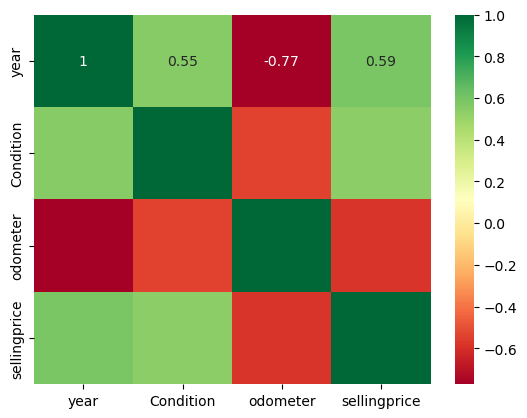

In [ ]:
numeric_columns = cars.select_dtypes(include=[np.number])
sns.heatmap(
    numeric_columns.corr(), 
    cmap="RdYlGn", 
    annot=True
)

#### Value Retention

* Filter your data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

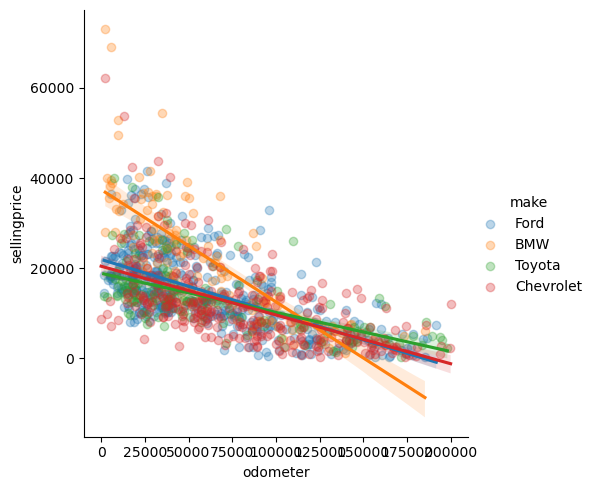

In [ ]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=cars.query("make in @brand_list and sellingprice <150000 and odometer < 200000").sample(1000),
    hue="make",
    scatter_kws=({"alpha": .3}),
)

In [ ]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])


LinregressResult(slope=-0.10685481663756413, intercept=20817.40087945698, rvalue=-0.5773626022967122, pvalue=0.0, stderr=0.00021986721091635334, intercept_stderr=18.586743504478314)

In [ ]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (-0.09953734771818888, 20840.011075886523)
BMW: (-0.22250330429676318, 35567.97974468479)
Toyota: (-0.07594777614361668, 17813.0171076853)
Chevrolet: (-0.0884104596277495, 18705.587357485056)


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

C:\Users\KAUSHAL PRAJAPATI\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


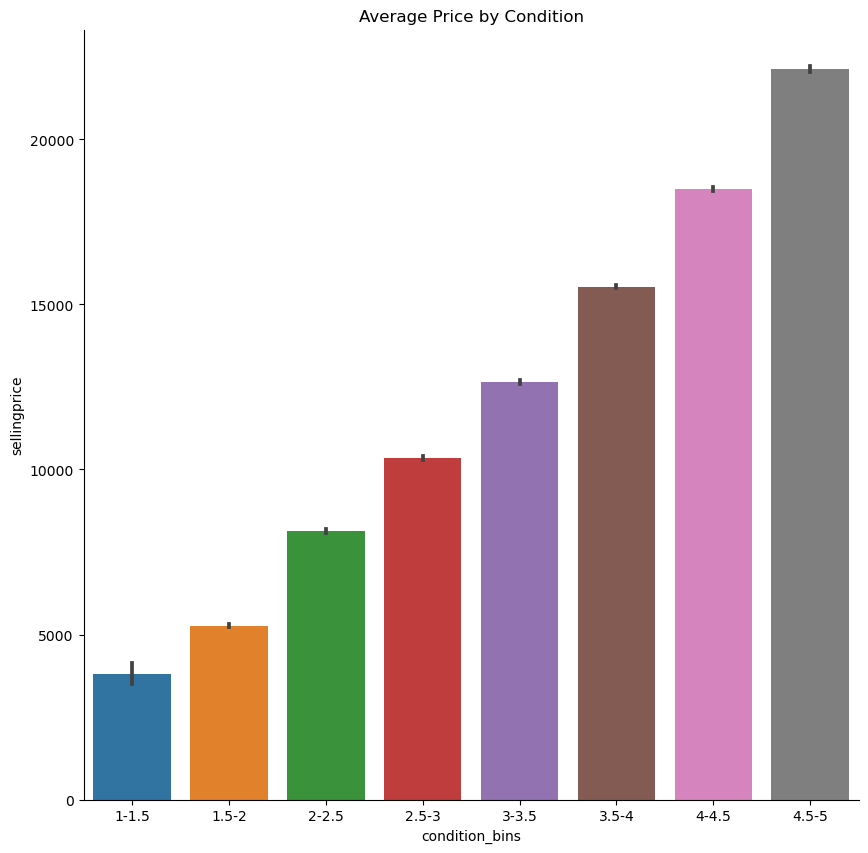

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

cars["condition_bins"] = pd.cut(cars["Condition"], bins=bins, labels=labels)

sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=cars
)

ax.set_title("Average Price by Condition")

sns.despine()

# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once you've created the table, build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match your expecations?

In [ ]:
cars["make"].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

In [ ]:
top10 = cars["make"].value_counts().iloc[:10].index

avgs = (cars
        .loc[cars["make"].isin(top10)]
        .pivot_table(index="make", 
                     columns="condition_bins", 
                     values={"sellingprice": "mean"}
                    )
        .droplevel(0, axis=1)
       )

avgs.head()

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556


<Axes: title={'center': 'Avg. Selling Price by Make and Quality'}, xlabel='condition_bins', ylabel='make'>

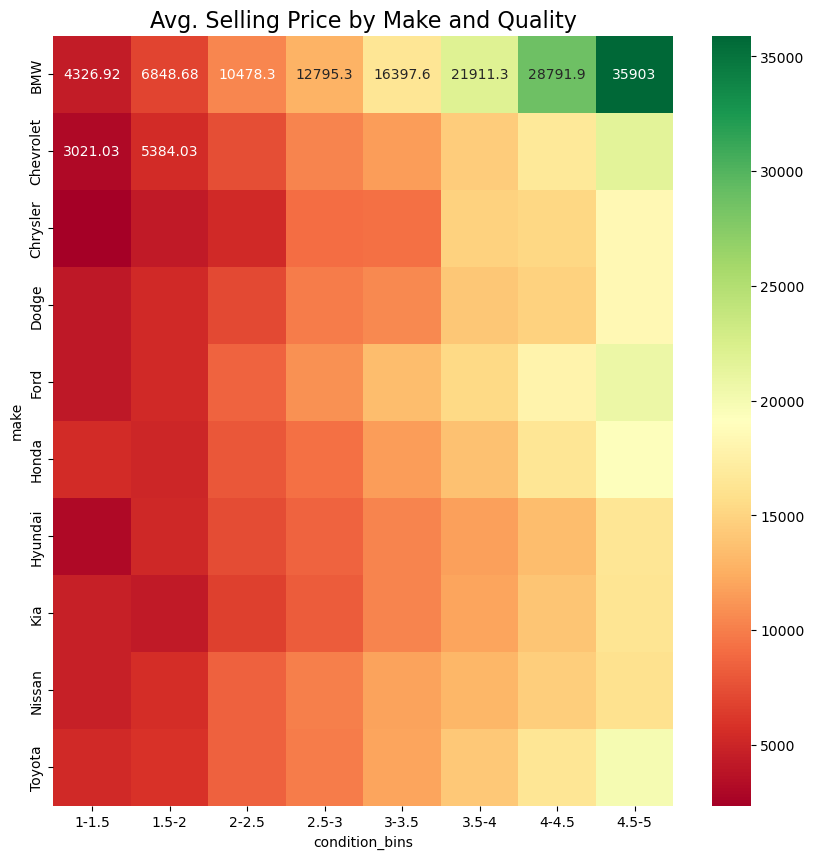

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


plt.title("Avg. Selling Price by Make and Quality", fontsize=16)

sns.heatmap(
    avgs,
    annot=True,
    cmap="RdYlGn",
    fmt="g"
)

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [ ]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,Condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


C:\Users\KAUSHAL PRAJAPATI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sellingprice', ylabel='Count'>

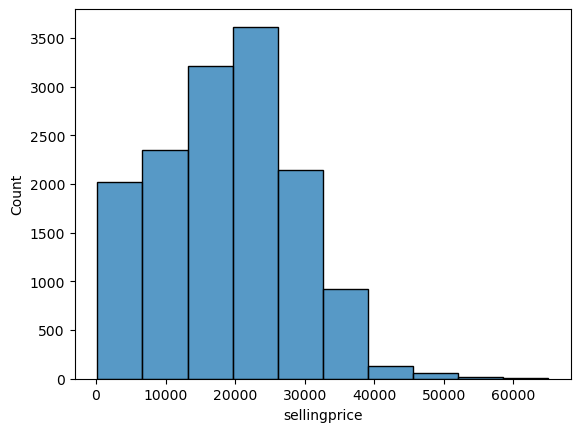

In [ ]:
sns.histplot(x="sellingprice",
            bins=10,
            data=f150s)

* Build a barplot of `sellingprice` by `trim` for the F150s.

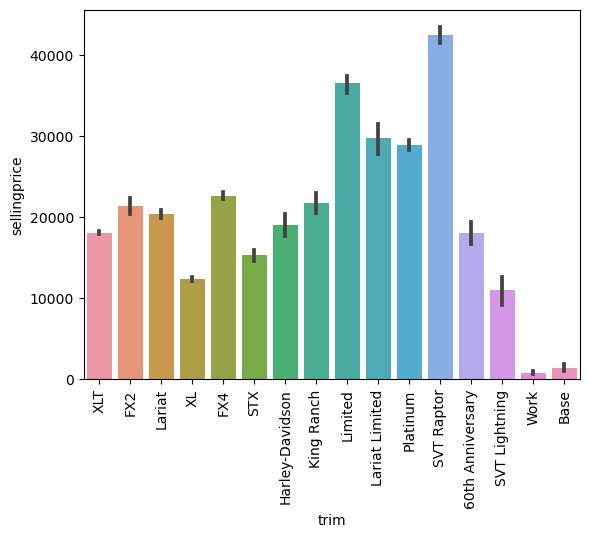

In [ ]:
fig, ax = plt.subplots()

sns.barplot(x="trim", y="sellingprice", data=f150s)

plt.xticks(rotation=90)

plt.show()

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

In [ ]:
f150s_reduced = f150s.query("trim in ['XL', 'XLT', 'Platinum', 'SVT Raptor']")

C:\Users\KAUSHAL PRAJAPATI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHAL PRAJAPATI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


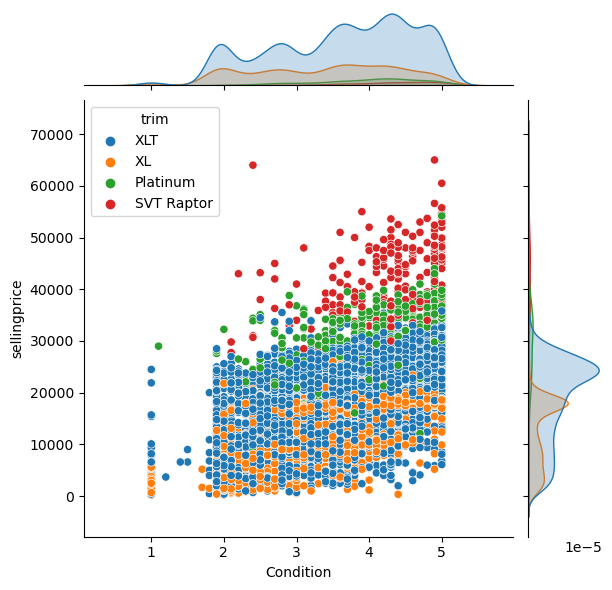

In [ ]:
sns.jointplot(
    x="Condition", 
    y="sellingprice", 
    kind="scatter", 
    data=f150s_reduced, 
    hue="trim"
)

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

In [ ]:
cars["mmr"] = pd.to_numeric(cars["mmr"], errors='coerce')

In [ ]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            558837 non-null  int64   
 1   make            548536 non-null  object  
 2   model           548438 non-null  object  
 3   trim            548186 non-null  object  
 4   body            545642 non-null  object  
 5   transmission    493484 non-null  object  
 6   vin             558833 non-null  object  
 7   state           558837 non-null  object  
 8   Condition       547043 non-null  float64 
 9   odometer        558743 non-null  float64 
 10  color           558088 non-null  object  
 11  interior        558088 non-null  object  
 12  seller          558837 non-null  object  
 13  mmr             558811 non-null  float64 
 14  sellingprice    558837 non-null  int64   
 15  saledate        558837 non-null  object  
 16  condition_bins  539678 non-null  categ

C:\Users\KAUSHAL PRAJAPATI\AppData\Local\Temp\ipykernel_164\287705615.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


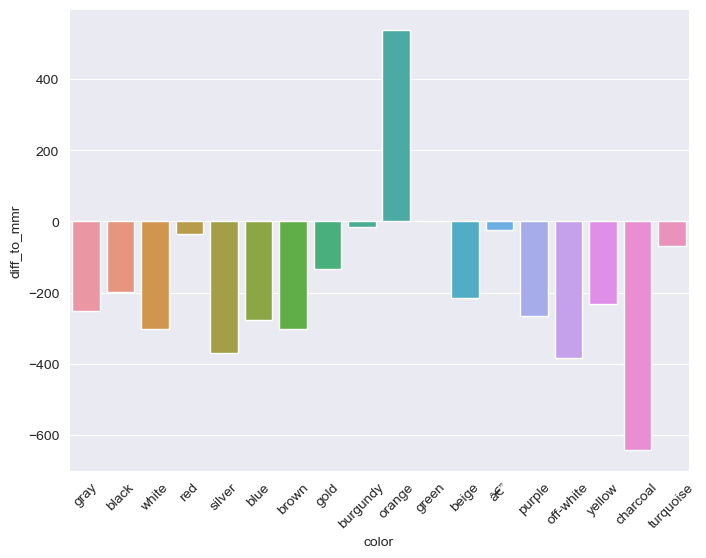

In [ ]:
sns.set_style("darkgrid")

def replace_non_float_with_value(column, replace_value):
    # Convert column to numeric, forcing errors to NaN
    column_numeric = pd.to_numeric(column, errors='coerce')
    # Fill NaN values with the specified float value
    column_filled = column_numeric.fillna(replace_value)
    return column_filled
    
replacement_value = 0.0

# Apply the function to the relevant columns
f150s['sellingprice'] = replace_non_float_with_value(f150s['sellingprice'], replacement_value)
f150s['mmr'] = replace_non_float_with_value(f150s['mmr'], replacement_value)

# Create a new column 'diff_to_mmr' based on the difference between 'sellingprice' and 'mmr'
f150s = f150s.assign(diff_to_mmr=f150s["sellingprice"] - f150s["mmr"])


# Set the seaborn style
sns.set_style("darkgrid")

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    x="color",
    y="diff_to_mmr",
    data=f150s,
    ci=None
)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
f150s.head()

,year,make,model,trim,body,transmission,vin,state,Condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,3800
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5,600
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5,-700


* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

In [ ]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s_reduced = f150s.query("color != 'orange' and trim in @trim_list")

f150s_pivot = (
    f150s_reduced
    .loc[f150s_reduced["year"].between(2009, 2014)]
    .pivot_table(
        index="trim",
        columns="condition_bins",
        values={"sellingprice": "mean"}
    )
)

<Axes: xlabel='None-condition_bins', ylabel='trim'>

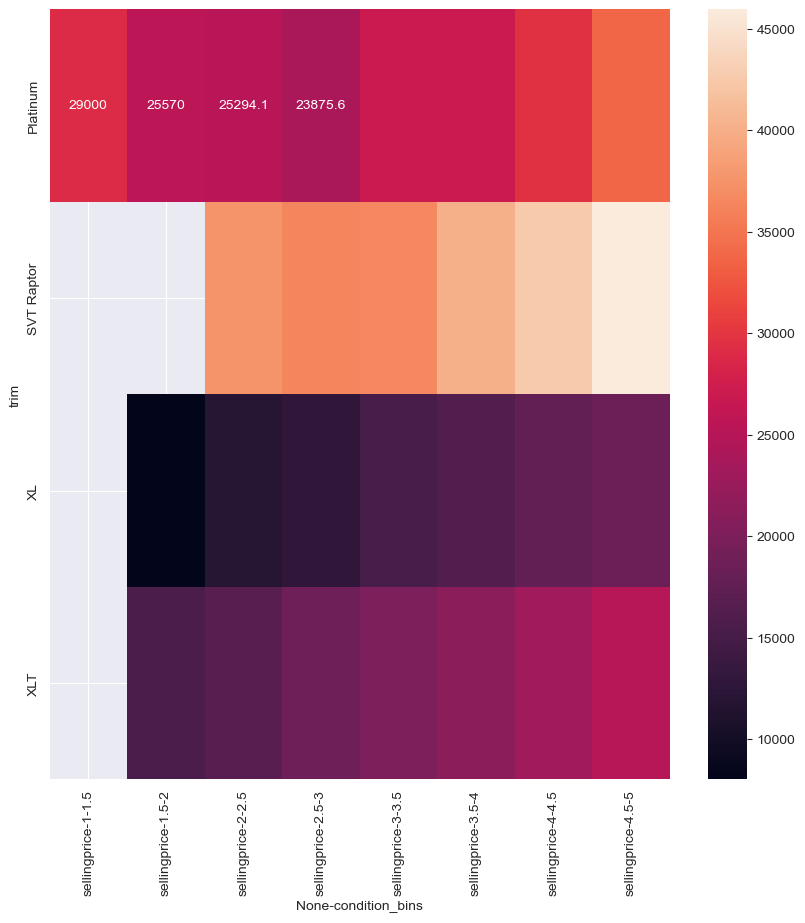

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(f150s_pivot, annot=True, fmt="g")

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

<Axes: xlabel='state', ylabel='auto_count'>

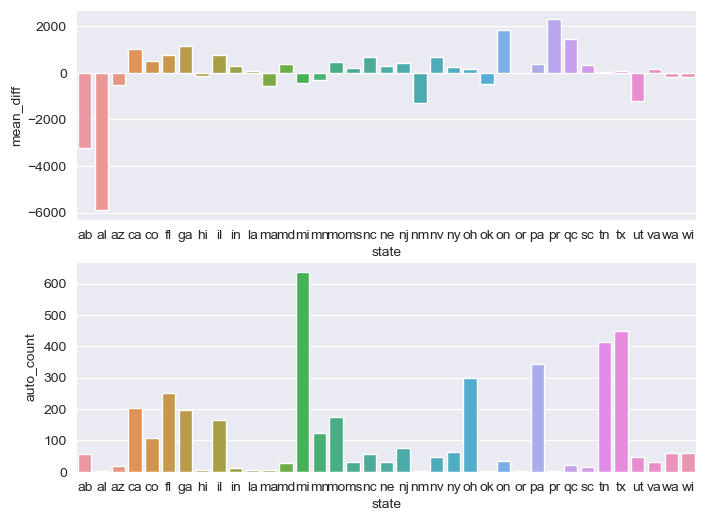

In [ ]:
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and Condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),
                 auto_count=("diff_to_mmr", "count")
             )
)

fig, ax = plt.subplots(2, figsize=(8, 6))

sns.barplot(
 x="state",
 y="mean_diff",
 data = f150s_XLT,
 ax=ax[0]
)

sns.barplot(
 x="state",
 y="auto_count",
 data = f150s_XLT,
 ax=ax[1]
)


* Ok, looks like Utah, `state=='ut'`, (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [ ]:
f150s.query("trim=='XLT' and state == 'ut' and Condition > 3.5").groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)  -600.000000     5